# Data Visualization

## **1. HTML Scatter Plots**

In [2]:
!pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.3 MB 9.7 MB/s 
     |████████████████████████████████| 24.1 MB 1.3 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=cfc75cf113dc8f7c639f479f676805d1034a20b8a42b65041921ab03d99408e7
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [3]:
import spacy
import scattertext as st

In [5]:
nlp = spacy.load('en_core_web_sm')

In [6]:
df = st.SampleCorpora.ConventionData2012.get_data()

In [7]:
# ToDo: What is inside the dataframe?


,party,text,speaker
0,democrat,Thank you. Thank you. Thank you. Thank you so ...,BARACK OBAMA
1,democrat,"Thank you so much. Tonight, I am so thrilled a...",MICHELLE OBAMA
2,democrat,Thank you. It is a singular honor to be here t...,RICHARD DURBIN
3,democrat,"Hey, Delaware. \nAnd my favorite Democrat, Jil...",JOSEPH BIDEN
4,democrat,"Hello. \nThank you, Angie. I'm so proud of how...",JILL BIDEN


In [10]:
# ToDo: Find how many unique parties are there?


In [11]:
corpus = st.CorpusFromPandas(df, category_col='party', text_col='text', nlp=nlp).build()

In [12]:
term_freq_df = corpus.get_term_freq_df()

In [13]:
term_freq_df.head()

,democrat freq,republican freq
term,,
thank,159,205
you,834,792
thank you,151,195
so,341,212
much,84,75


In [14]:
html = st.produce_scattertext_explorer(corpus, 
                                       category='democrat',
                                       category_name='Democratic',
                                       not_category_name='Republican',
                                       width_in_pixels=1000,
                                       metadata=df['speaker'])

open("Convention-Visualization.html", 'wb').write(html.encode('utf-8'))

1700106

In [15]:
from IPython.core.display import display, HTML

display(HTML(html))

# 2. Word Cloud

In [16]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import matplotlib.pyplot as plt
import pandas as pd

from wordcloud import WordCloud, STOPWORDS

In [19]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

# Todo: How do we select the text by only democrats from the data frame?

In [31]:
#@title [Click here to see the solution.]
# democrats_text = " ".join(str(tt) for tt in df.loc[df['party'] == 'democrat', 'text'])

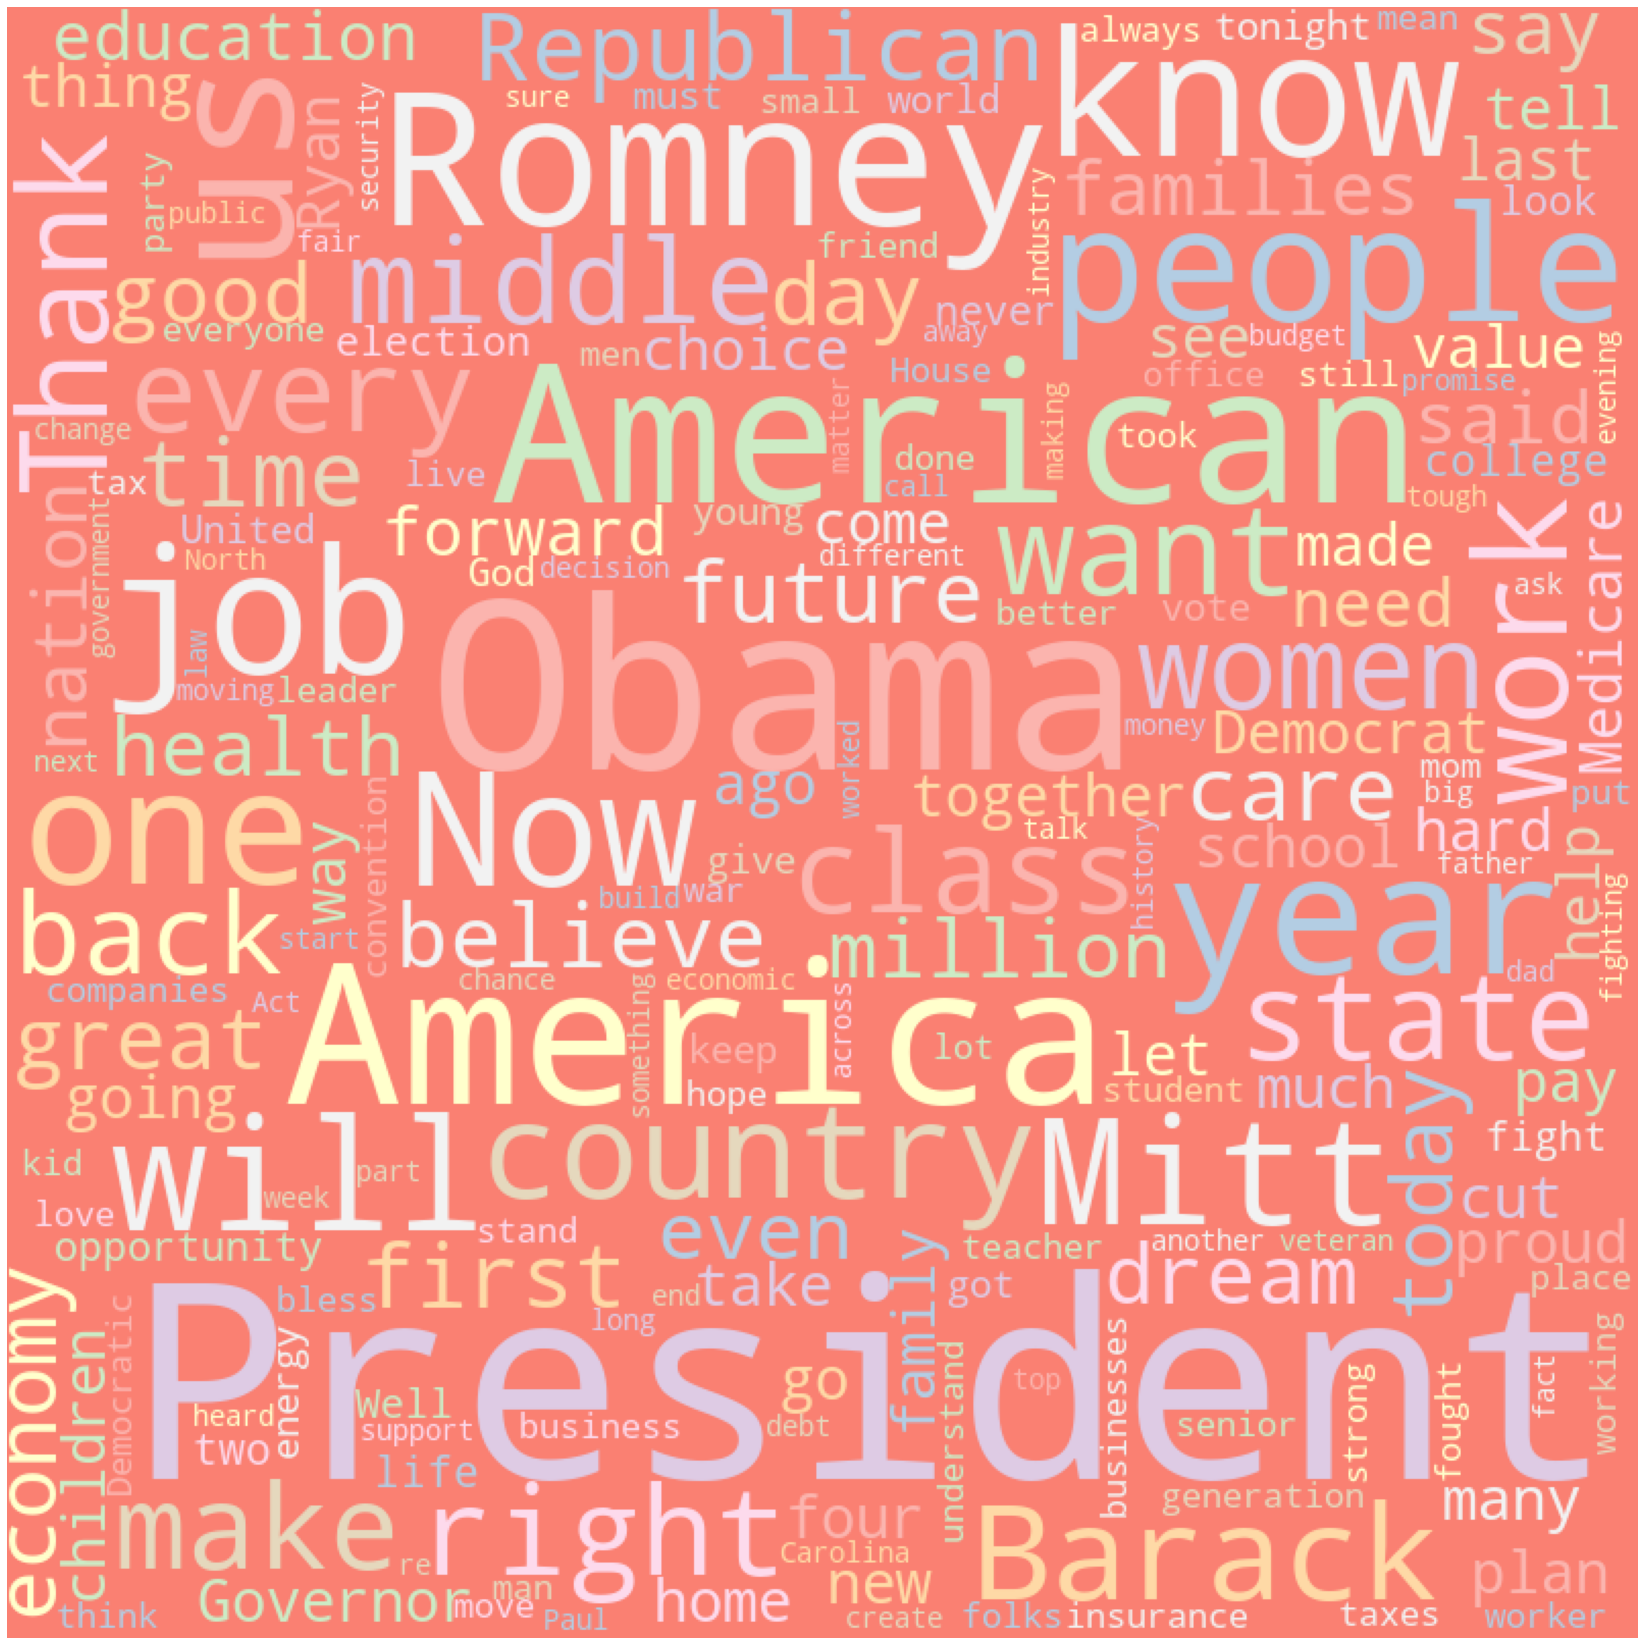

In [26]:
democrats_text = " ".join(str(tt) for tt in df.loc[df['party'] == 'democrat', 'text'])

wordcloud = WordCloud(width=800, height=800, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = list(STOPWORDS)).generate(democrats_text)

plot_cloud(wordcloud)

Could we plot the same for republican candidates?

In [29]:
#@title [Click here to see the solution.]

# republican_text = " ".join(str(tt) for tt in df.loc[df['party'] == 'republican', 'text'])
# wordcloud = WordCloud(width = 800, height = 800, random_state=1, background_color='skyblue', colormap='Pastel1', collocations=False, stopwords = list(STOPWORDS)).generate(democrats_text)
# plot_cloud(wordcloud)
# wordcloud.to_file("republican_wordcloud.png")